<a href="https://colab.research.google.com/github/podo47/DLBVD_HW2/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

In [86]:
import torch

### (a) Tensor

Construct an uninitialized 4x4 matrix:





In [87]:
# todo
x = torch.empty(4,4)
print(x)

tensor([[1.5766e-19, 1.0256e-08, 1.6408e-07, 3.1128e+12],
        [2.7096e-09, 2.6409e-06, 1.6804e-04, 1.2610e+16],
        [2.1707e-18, 7.0952e+22, 1.7748e+28, 1.8176e+31],
        [7.2708e+31, 5.0778e+31, 3.2608e-12, 1.7728e+28]])


Construct a randomly initialized 3x3 matrix from a uniform distribution on the interval [0, 10)

In [88]:
# todo
x = torch.rand(3,3) * 10
print(x)

tensor([[1.0234, 8.2278, 9.5391],
        [8.3336, 0.8676, 5.6392],
        [9.5681, 9.2228, 7.4608]])


Construct a 2x2 matrix filled zeros with data type float32:

In [89]:
# todo
x = torch.zeros(2,2,dtype=torch.float32)
print(x)

tensor([[0., 0.],
        [0., 0.]])


Construct a 5x5 matrix from the normal distribution with zero mean and one std with the same shape as x. 

y's data type should be float32. 

Print the size of x and y.

In [90]:
x = torch.ones(5, 5, dtype=torch.float64)
# todo
y = torch.randn_like(x, dtype=torch.float32)
print(y)
# todo: print the size of x and y
print("Size of x : ", x.size())
print("Size of y : ", y.size())

tensor([[-0.2903,  0.0145, -1.0787, -0.7277,  0.3582],
        [ 0.3031,  0.9980, -0.5568,  1.5589, -0.1258],
        [-0.3282,  0.7227,  0.0942, -0.7655,  0.0519],
        [-1.5135, -0.9475,  1.2163, -0.8136,  0.3875],
        [ 0.4674,  0.0111, -0.2428, -1.9176, -0.6775]])
Size of x :  torch.Size([5, 5])
Size of y :  torch.Size([5, 5])


### (b) Operations

Addition: Print x + y

In [91]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)
print(x)
print(y)
# todo
print('x + y = ')
print(torch.add(x,y))

tensor([[1., 2.],
        [3., 4.]])
tensor([[4., 5.],
        [6., 7.]])
x + y = 
tensor([[ 5.,  7.],
        [ 9., 11.]])


Addition: add y and x inplace (modify y)

In [92]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)

# todo: adds x to y
y.add_(x)
print(y)

tensor([[ 5.,  7.],
        [ 9., 11.]])


Indexing

In this part, you will use indexing techniques to access part of data store in tensor **x**.
x is a 3x3x3 matrix.

For simplicity, we let (a, b, c) represents the a-th in the first axis, b-th in the second axis and c-th in the third axis, a, b and c start from 0, 

e.g get x at (0, 1, 1) is to get the first in the first axis, second in the second axis and second in the third axis of x, which returns 5. 

We also let getting x at (0:2, 1, 1) mean get the first two rows in the first axis, second in the second axis and second in the third axis.

Hint: You should use standard NumPy-like indexing.


In [93]:
x = torch.arange(1, 28, dtype=torch.int32).reshape(3, 3, 3)
print(x)
# Example: get (0, 1, 1) of x
print(x[0, 1, 1])
# Example: get (0:2, 1, 1) of x
print(x[0:2, 1, 1])

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]], dtype=torch.int32)
tensor(5, dtype=torch.int32)
tensor([ 5, 14], dtype=torch.int32)


In [94]:
# todo: get (1, 2, 1) of x
print(x[1, 2, 1])
# todo: get (0, 1:3, 1) of x
print(x[0, 1:3, 1])
# todo: get (1:3, 0:3, 1:3) of x
print(x[1:3, 0:3, 1:3])

tensor(17, dtype=torch.int32)
tensor([5, 8], dtype=torch.int32)
tensor([[[11, 12],
         [14, 15],
         [17, 18]],

        [[20, 21],
         [23, 24],
         [26, 27]]], dtype=torch.int32)


Resizing

In [95]:
A = torch.arange(12)

# todo: resize A to 3x4 using view
print(A.view(3,4))
# todo: resize A to 4x3 using reshape
print(A.reshape(4,3))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


###Question 
**What is the difference between view and reshape of a tensor?**


---


**Answer :**

The difference is that "view" creates new tensor with the same data as the original tensor, so it can only be used to resize tensor with the same number of elements as the original tensor.

While "reshape" can create new tensor with any new shape, regardless of the number of elements. So it can also rearrange the data if necessary to fit the new defined shape. 

## Problem 2

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from the [google drive link](https://drive.google.com/file/d/13BJmpfohMGthH9gGRYgxMyBk3Y2J8vE8/view?usp=sharing) and put into your Google Drive.
Mount your Google Drive to this notebook.

In [1]:
# Show matplotlib graphs in your notebook
%matplotlib inline

In [2]:
# Mount your Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load MNIST dataset from your Google Drive. 

Different from HW1, we downsample the data from 28x28 to 14x14.
The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

In [3]:
from scipy.io import loadmat
import torch
import torchvision.transforms as T


mnist = loadmat('/content/gdrive/MyDrive/mnist.mat') # change the file path according to the path where you put mnist.mat on your Google Drive.

# convert data to torch, normalize and reshape
# Reshape (1,28,28) and normalize to -0.5 - 0.5
data = torch.reshape(torch.from_numpy(mnist['traindata']).to(torch.float)/255.0 - 0.5, (mnist['traindata'].shape[0], 1, 28, 28))
testdata = torch.reshape(torch.from_numpy(mnist['testdata']).to(torch.float)/255.0 - 0.5, (mnist['testdata'].shape[0], 1, 28, 28))

trainlabels = torch.from_numpy(mnist['trainlabels'].ravel()[:50000])
validlabels = torch.from_numpy(mnist['trainlabels'].ravel()[50000:])

resize = T.Resize((14,14))
data = resize(data)
testdata = resize(testdata)
traindata = data[:50000]
validdata = data[50000:]


print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([50000, 1, 14, 14])
torch.Size([50000])
torch.Size([10000, 1, 14, 14])
torch.Size([10000])
torch.Size([10000, 1, 14, 14])


In [4]:
from torch.utils.data import TensorDataset, DataLoader

mnist_train = TensorDataset(traindata, trainlabels)
mnist_valid = TensorDataset(validdata, validlabels)
mnist_train_loader = DataLoader(mnist_train, batch_size=128, shuffle=True)
mnist_valid_loader = DataLoader(mnist_valid, batch_size=128)



Visualize an image with label.

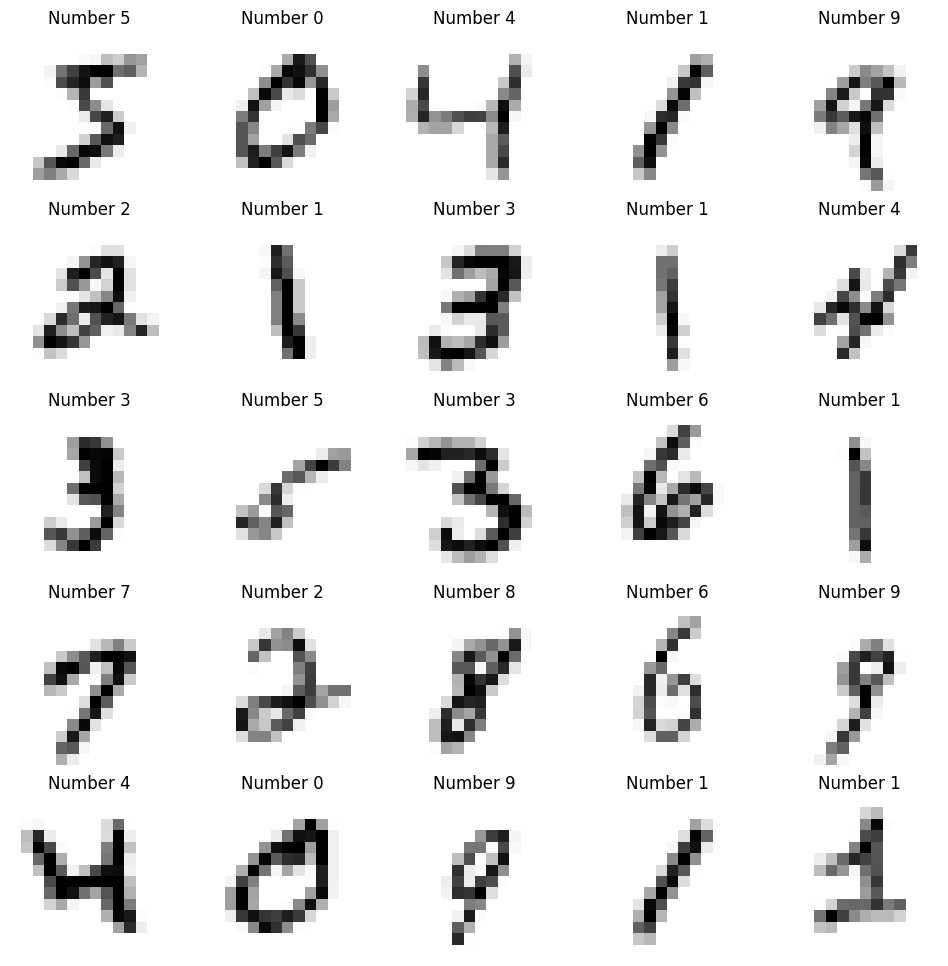

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow((mnist_train[i][0] + 0.5 ).reshape((14, 14)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) Multilayer Perceptron (MLP)

Use MLP to achieve image classification.

Define the following MLP using PyTorch to do image classification on MNIST dataset according to the below figure:
Number of hidden layers: 3
Number of neurons in the layers: [100, 50, 20]
Activation functions: ReLU()
Dropout for all hidden layers: 30%
Output layer + softmax


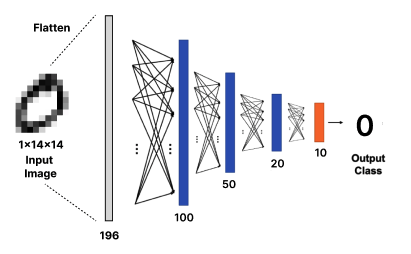

To feed the data into the MLP, each image with dim of $1 \times 14 \times 14$ needs to be flatten into a vector with dim of $196.

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU. Let's first define our device as the first visible cuda device if we have CUDA available.

**Note**: remember to keep the logs of training the different models.

In [6]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [7]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # TODO: define your MLP
    self.fc1 = nn.Linear(196,100)
    self.fc2 = nn.Linear(100,50)
    self.fc3 = nn.Linear(50,20)
    self.output = nn.Linear(20,10)
    self.dropout = nn.Dropout(p=0.3)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    # TODO: define your forward function
    
    # Flatten the input
    x = x.view(-1, 196)
        
    # Forward 
    x = self.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.softmax(self.output(x))
    return x


In [8]:
from tqdm import tqdm

In [9]:
# TODO: write your training code
def train(model, criterion, optimizer, traindata_loader):
  model.train()
  train_loss = 0.0
  train_acc = 0.0

  bar = tqdm(traindata_loader)
  bar.set_description(f"Training...")

  for batch, (X, y) in enumerate(bar):
    # Move data to device
    X, y = X.to(device), y.to(device)
    # Clear gradients
    optimizer.zero_grad()
    # Forward pass (make prediction)
    pred = model(X)
    # Compute loss
    loss = criterion(pred, y)
    # Backpropagation (compute gradient)
    loss.backward()
    # Updata model with optimizer
    optimizer.step()
    train_loss += loss.item() * len(X)
    train_acc += (pred.argmax(dim=-1) == y).float().sum().item()
    
    if batch % 100 == 0:
      bar.set_postfix({"Batch average loss": f"{loss.item():.4f}"})

  avg_loss =  train_loss / len(traindata_loader.dataset)
  avg_acc = train_acc / len(traindata_loader.dataset)

  return avg_loss, avg_acc

# TODO: write your testing code
# If test data has labels, "label = True"
def test(model, criterion, testdata_loader, label = False):
  model.eval()
  test_loss = 0.0
  test_acc = 0.0
  prediction = []

  with torch.no_grad():
    for X, y in tqdm(testdata_loader):
      X, y = X.to(device), y.to(device)
      pred = model(X)
      
      if label:
        loss = criterion(pred, y)
        test_loss += loss.item() * len(X)
        test_acc += (pred.argmax(dim=-1) == y).float().sum().item()

      prediction.extend(pred.argmax(dim=-1).cpu().numpy().tolist())  
  if label:
    avg_test_loss =  round(test_loss / len(testdata_loader.dataset), 4)
    avg_test_acc = round(test_acc / len(testdata_loader.dataset), 4)
    print(f"Average test loss: {avg_test_loss:.4f} | Average test Acc: {avg_test_acc:.4f}")

    return prediction, avg_test_loss, avg_test_acc
  else:
    return prediction


In [10]:
mlp = MLP().to(device)  # operate on GPU

In [11]:
print("The MLP model : \n",mlp)

The MLP model : 
 MLP(
  (fc1): Linear(in_features=196, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


Define a loss function and optimizer.

In [12]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network. 

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [ ]:
n_epoch = 10
# todo: use your train() to train the model
for epoch in range(n_epoch):
  avg_train_loss, avg_train_acc = train(mlp, criterion, optimizer, mnist_train_loader)
  print(f"Epoch {epoch+1} | Average train loss: {avg_train_loss:.4f} / Average train Acc: {avg_train_acc:.4f} \n")

Training...: 100%|██████████| 391/391 [00:03<00:00, 102.12it/s, Batch average loss=1.8520]


Epoch 1 | Average train loss: 1.9982 / Average train Acc: 0.4747 



Training...: 100%|██████████| 391/391 [00:01<00:00, 316.17it/s, Batch average loss=1.6668]


Epoch 2 | Average train loss: 1.7048 / Average train Acc: 0.7741 



Training...: 100%|██████████| 391/391 [00:01<00:00, 307.23it/s, Batch average loss=1.5625]


Epoch 3 | Average train loss: 1.6351 / Average train Acc: 0.8385 



Training...: 100%|██████████| 391/391 [00:01<00:00, 293.54it/s, Batch average loss=1.5741]


Epoch 4 | Average train loss: 1.6117 / Average train Acc: 0.8578 



Training...: 100%|██████████| 391/391 [00:01<00:00, 302.54it/s, Batch average loss=1.5975]


Epoch 5 | Average train loss: 1.5965 / Average train Acc: 0.8719 



Training...: 100%|██████████| 391/391 [00:01<00:00, 313.24it/s, Batch average loss=1.5824]


Epoch 6 | Average train loss: 1.5891 / Average train Acc: 0.8784 



Training...: 100%|██████████| 391/391 [00:01<00:00, 317.66it/s, Batch average loss=1.6339]


Epoch 7 | Average train loss: 1.5819 / Average train Acc: 0.8847 



Training...: 100%|██████████| 391/391 [00:01<00:00, 232.60it/s, Batch average loss=1.6160]


Epoch 8 | Average train loss: 1.5749 / Average train Acc: 0.8907 



Training...: 100%|██████████| 391/391 [00:01<00:00, 224.57it/s, Batch average loss=1.5898]


Epoch 9 | Average train loss: 1.5718 / Average train Acc: 0.8935 



Training...: 100%|██████████| 391/391 [00:01<00:00, 291.62it/s, Batch average loss=1.5469]

Epoch 10 | Average train loss: 1.5679 / Average train Acc: 0.8978 



Save the trained model. 
See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

In [13]:
PATH = '/content/gdrive/MyDrive/DLBVD/HW2/mlp_mnist.pth'

Optional : Save the trained model

In [ ]:
torch.save(mlp.state_dict(), PATH)

Load back in our saved model. (Note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so)



In [14]:
mlp = MLP().to(device)
mlp.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [75]:
print(mlp)
# todo: use your test() to test your MLP on val set
mlp_valid_pred, mlp_valid_avloss, mlp_valid_avacc = test(mlp, criterion, mnist_valid_loader, label=True)

MLP(
  (fc1): Linear(in_features=196, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


100%|██████████| 79/79 [00:00<00:00, 198.54it/s]

Average test loss: 1.5287 | Average test Acc: 0.9321


### (c) Convolution Neural Network (CNN)

Built a LeNet-5 using PyTorch to do image classification. Develop the CNN from the PyTorch NN tutorial introduced in class. 

Note: 
1. The input image dimension shown in the figure below is different from the one we have in this problem.
2. Use kernel size=3 for both convolutions (Original LeNet-5 uses kernel size=5 as shown in the Fig.3 of HW2.pdf)


In [16]:
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, 6, 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
    self.fc_layers = nn.Sequential(
            nn.Linear(16*2*2, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10))

  def forward(self, x):
    # TODO: define your forward function
    x = self.cnn_layers(x)
    x = x.flatten(1)
    x = self.fc_layers(x)

    return x

In [17]:
cnn_mnist = CNN().to(device)  # operate on GPU

In [18]:
print("The CNN model : \n",cnn_mnist)

The CNN model : 
 CNN(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=64, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [19]:
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_mnist.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [20]:
mnist_train_loader = DataLoader(mnist_train, batch_size=32, shuffle=True)

In [ ]:
# todo: similar to MLP, train your CNN model
n_epoch = 10
# todo: use your train() to train the model
for epoch in range(n_epoch):
  cnn_avg_train_loss, cnn_avg_train_acc = train(cnn_mnist, criterion, optimizer, mnist_train_loader)
  print(f"Epoch {epoch+1} | Average train loss: {cnn_avg_train_loss:.4f} / Average train Acc: {cnn_avg_train_acc:.4f} \n")

Training...: 100%|██████████| 1563/1563 [00:08<00:00, 184.05it/s, Batch average loss=0.9233]


Epoch 1 | Average train loss: 1.4117 / Average train Acc: 0.5860 



Training...: 100%|██████████| 1563/1563 [00:05<00:00, 300.17it/s, Batch average loss=0.2440]


Epoch 2 | Average train loss: 0.4977 / Average train Acc: 0.8538 



Training...: 100%|██████████| 1563/1563 [00:05<00:00, 289.22it/s, Batch average loss=0.1465]


Epoch 3 | Average train loss: 0.3536 / Average train Acc: 0.8945 



Training...: 100%|██████████| 1563/1563 [00:04<00:00, 315.11it/s, Batch average loss=0.3699]


Epoch 4 | Average train loss: 0.2903 / Average train Acc: 0.9120 



Training...: 100%|██████████| 1563/1563 [00:05<00:00, 269.79it/s, Batch average loss=0.4905]


Epoch 5 | Average train loss: 0.2482 / Average train Acc: 0.9235 



Training...: 100%|██████████| 1563/1563 [00:04<00:00, 316.73it/s, Batch average loss=0.3894]


Epoch 6 | Average train loss: 0.2198 / Average train Acc: 0.9331 



Training...: 100%|██████████| 1563/1563 [00:05<00:00, 297.79it/s, Batch average loss=0.1824]


Epoch 7 | Average train loss: 0.1968 / Average train Acc: 0.9392 



Training...: 100%|██████████| 1563/1563 [00:05<00:00, 281.83it/s, Batch average loss=0.1916]


Epoch 8 | Average train loss: 0.1806 / Average train Acc: 0.9438 



Training...: 100%|██████████| 1563/1563 [00:05<00:00, 312.55it/s, Batch average loss=0.0521]


Epoch 9 | Average train loss: 0.1666 / Average train Acc: 0.9481 



Training...: 100%|██████████| 1563/1563 [00:05<00:00, 270.36it/s, Batch average loss=0.1678]

Epoch 10 | Average train loss: 0.1550 / Average train Acc: 0.9522 



In [21]:
PATH_cnn = '/content/gdrive/MyDrive/DLBVD/HW2/cnn_mnist.pth'

Optional : Save the trained model

In [ ]:
torch.save(cnn_mnist.state_dict(), PATH_cnn)

Load back in our saved model

In [22]:
cnn_mnist = CNN().to(device)
cnn_mnist.load_state_dict(torch.load(PATH_cnn))

<All keys matched successfully>

In [23]:
print(cnn_mnist)
# todo: use your test() to test your CNN on val set
cnn_valid_pred, cnn_valid_avloss, cnn_valid_avacc = test(cnn_mnist, criterion, mnist_valid_loader, label=True)
#cnn_test_pred = test(cnn_mnist, criterion, mnist_test_loader, label=True)

CNN(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=64, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


100%|██████████| 79/79 [00:03<00:00, 21.95it/s]

Average test loss: 0.1364 | Average test Acc: 0.9595


## Problem 3: Image Classification by CNN

Write code to load and visualize the CIFAR-10 dataset.

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size. 

<h4>Note:</h4>
The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

In [24]:
from torchvision import transforms, datasets

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_trainset = datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)

cifar_loader = DataLoader(cifar10_trainset, batch_size=len(cifar10_trainset), shuffle=False)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=len(cifar10_testset), shuffle=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 48616290.46it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified


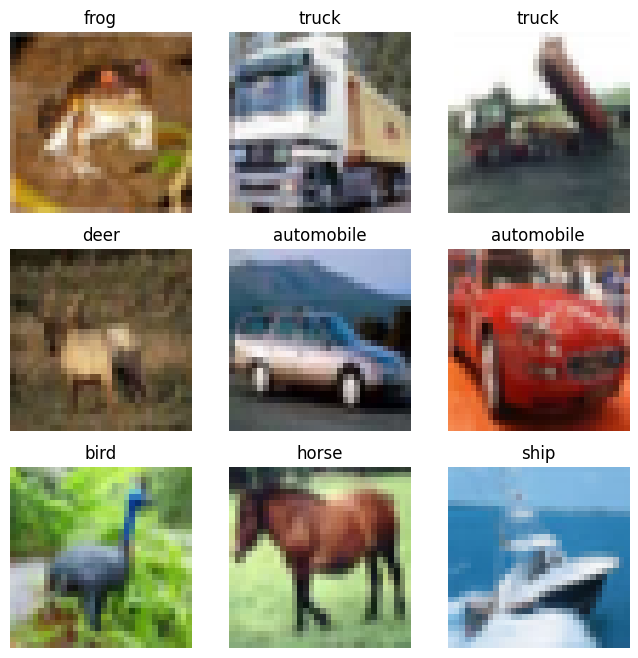

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

# TODO: visualize some samples in the CIFAR-10 dataset
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
  img, label = cifar10_trainset[i]
  # Denormalize
  img = img / 2 + 0.5
  ax.imshow(img.permute(1, 2, 0))
  ax.axis('off')
  ax.set_title(cifar10_trainset.classes[label])

#### Data Augmentation

In [26]:
from torch.utils.data import ConcatDataset

transform1 = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# todo: Implements transforms

# Shifting: randomly shift the images up/down and left/right by within 10%.
transform2 = transforms.Compose(
    [transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Rotating: randomly rotate the images by some angles.
transform3 = transforms.Compose(
    [transforms.RandomRotation(degrees=45),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Flipping: horizontally flip the images.
transform4 = transforms.Compose(
    [transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Adding Noise: randomly add some small Gaussian noise to the images.
transform5 = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.3),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_list = [transform1, transform2, transform3, transform4, transform5]
augmented_dataset = []
for t in transform_list:
  augmented_dataset.append(datasets.CIFAR10(root='./data/', train=True, download=True, transform=t))

cifar10_train_dataset = ConcatDataset(augmented_dataset)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform1)
# Dataloader
cifar_train_loader = DataLoader(cifar10_train_dataset, batch_size=256, shuffle=True)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Define a CNN to do classification on CIFAR-10 dataset. You can build a CNN from the previous problem and modify it to take 3-channel images (instead of 1-channel images as it was defined).

**Note**: remember to keep the logs of training the different models.

(1) Define a CNN using PyTorch to do image classification. Develop the CNN from the previous PyTorch NN tutorial.

In [27]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### CNN1
○ # of conv: 2

○ # of pool: 2

○ Kernel size (conv): 5x5

○ Stride (cov): 1x1

○ Dilation: 1x1

○ Dropout in FC: 0%

○ FC layer : 120 -> 84 -> 10

In [28]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 6, 5, stride=1, dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6, 16, 5, stride=1,  dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
    self.fc_layers = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10))

  def forward(self, x):
    # TODO: define your forward function
    x = self.cnn_layers(x)
    x = x.flatten(1)
    x = self.fc_layers(x)
    return x


In [29]:
cnn1 = CNN1().to(device)  # operate on GPU

Define a loss function and optimizer.

In [30]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network.

In [ ]:
# todo: use your train() to train your cnn1
n_epoch = 10
# todo: use your train() to train the model
for epoch in range(n_epoch):
  cnn1_avg_train_loss, cnn1_avg_train_acc = train(cnn1, criterion, optimizer, cifar_train_loader)
  print(f"Epoch {epoch+1} | Average train loss: {cnn1_avg_train_loss:.4f} / Average train Acc: {cnn1_avg_train_acc:.4f} \n")

Training...: 100%|██████████| 977/977 [01:38<00:00,  9.92it/s, Batch average loss=1.4429]


Epoch 1 | Average train loss: 1.5880 / Average train Acc: 0.4260 



Training...: 100%|██████████| 977/977 [01:34<00:00, 10.38it/s, Batch average loss=1.3206]


Epoch 2 | Average train loss: 1.3339 / Average train Acc: 0.5210 



Training...: 100%|██████████| 977/977 [01:32<00:00, 10.57it/s, Batch average loss=1.1985]


Epoch 3 | Average train loss: 1.2400 / Average train Acc: 0.5581 



Training...: 100%|██████████| 977/977 [01:31<00:00, 10.63it/s, Batch average loss=1.1112]


Epoch 4 | Average train loss: 1.1795 / Average train Acc: 0.5814 



Training...: 100%|██████████| 977/977 [01:30<00:00, 10.77it/s, Batch average loss=1.1478]


Epoch 5 | Average train loss: 1.1338 / Average train Acc: 0.5982 



Training...: 100%|██████████| 977/977 [01:30<00:00, 10.77it/s, Batch average loss=1.1086]


Epoch 6 | Average train loss: 1.1025 / Average train Acc: 0.6104 



Training...: 100%|██████████| 977/977 [01:32<00:00, 10.54it/s, Batch average loss=1.0048]


Epoch 7 | Average train loss: 1.0767 / Average train Acc: 0.6199 



Training...: 100%|██████████| 977/977 [01:29<00:00, 10.86it/s, Batch average loss=1.0751]


Epoch 8 | Average train loss: 1.0534 / Average train Acc: 0.6284 



Training...: 100%|██████████| 977/977 [01:30<00:00, 10.75it/s, Batch average loss=1.0740]


Epoch 9 | Average train loss: 1.0354 / Average train Acc: 0.6338 



Training...: 100%|██████████| 977/977 [01:32<00:00, 10.60it/s, Batch average loss=1.0486]

Epoch 10 | Average train loss: 1.0222 / Average train Acc: 0.6393 



In [31]:
PATH_cnn1 = '/content/gdrive/MyDrive/DLBVD/HW2/cnn1_cifar.pth'

Optional : Save the trained model

In [ ]:
torch.save(cnn1.state_dict(), PATH_cnn1)

Load back in our saved model

In [32]:
cnn1 = CNN1().to(device)
cnn1.load_state_dict(torch.load(PATH_cnn1))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [33]:
print(cnn1)

CNN1(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [34]:
# todo: use your test() to test your cnn1
cnn1_test_pred, cnn1_test_avloss, cnn1_test_avacc = test(cnn1, criterion, cifar_test_loader, label=True)

100%|██████████| 79/79 [00:02<00:00, 28.35it/s]

Average test loss: 0.9881 | Average test Acc: 0.6537


(2) Try different network parameters/configurations (at least 5 combinations). 

You should try to achieve at least **80%** accuracy on the CIFAR-10 testing set using one of your network configuration.


Performances using different configurations

todo: past your performance v.s different network configurations in a table.

### CNN2
○ # of conv: 2

○ # of pool: 2

○ Kernel size (conv): 5x5

○ Stride (cov): 1x1

○ Dilation: 1x1

○ Dropout in FC: 30%

○ FC layer : 120 -> 84 -> 10

In [35]:
class CNN2(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 6, 5, stride=1, dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6, 16, 5, stride=1,  dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
    self.fc_layers = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(84, 10))

  def forward(self, x):
    # TODO: define your forward function
    x = self.cnn_layers(x)
    x = x.flatten(1)
    x = self.fc_layers(x)
    return x


In [36]:
cnn2 = CNN2().to(device)  # operate on GPU

In [37]:
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn2.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network

In [ ]:
# todo: use your train() to train your cnn1
n_epoch = 10
# todo: use your train() to train the model
for epoch in range(n_epoch):
  cnn2_avg_train_loss, cnn2_avg_train_acc = train(cnn2, criterion, optimizer, cifar_train_loader)
  print(f"Epoch {epoch+1} | Average train loss: {cnn2_avg_train_loss:.4f} / Average train Acc: {cnn2_avg_train_acc:.4f} \n")

Training...: 100%|██████████| 977/977 [01:31<00:00, 10.67it/s, Batch average loss=1.4272]


Epoch 1 | Average train loss: 1.6566 / Average train Acc: 0.3961 



Training...: 100%|██████████| 977/977 [01:31<00:00, 10.65it/s, Batch average loss=1.4977]


Epoch 2 | Average train loss: 1.4300 / Average train Acc: 0.4880 



Training...: 100%|██████████| 977/977 [01:33<00:00, 10.44it/s, Batch average loss=1.3505]


Epoch 3 | Average train loss: 1.3539 / Average train Acc: 0.5176 



Training...: 100%|██████████| 977/977 [01:32<00:00, 10.61it/s, Batch average loss=1.2668]


Epoch 4 | Average train loss: 1.3072 / Average train Acc: 0.5365 



Training...: 100%|██████████| 977/977 [01:34<00:00, 10.32it/s, Batch average loss=1.2930]


Epoch 5 | Average train loss: 1.2724 / Average train Acc: 0.5494 



Training...: 100%|██████████| 977/977 [01:32<00:00, 10.56it/s, Batch average loss=1.1089]


Epoch 6 | Average train loss: 1.2527 / Average train Acc: 0.5576 



Training...: 100%|██████████| 977/977 [01:34<00:00, 10.38it/s, Batch average loss=1.2320]


Epoch 7 | Average train loss: 1.2332 / Average train Acc: 0.5647 



Training...: 100%|██████████| 977/977 [01:35<00:00, 10.27it/s, Batch average loss=1.3051]


Epoch 8 | Average train loss: 1.2215 / Average train Acc: 0.5689 



Training...: 100%|██████████| 977/977 [01:33<00:00, 10.41it/s, Batch average loss=1.0774]


Epoch 9 | Average train loss: 1.2128 / Average train Acc: 0.5736 



Training...: 100%|██████████| 977/977 [01:33<00:00, 10.47it/s, Batch average loss=1.0755]

Epoch 10 | Average train loss: 1.2024 / Average train Acc: 0.5773 



In [38]:
PATH_cnn2 = '/content/gdrive/MyDrive/DLBVD/HW2/cnn2_cifar.pth'

Optional : Save the trained model

In [ ]:
torch.save(cnn2.state_dict(), PATH_cnn2)

Load back in our saved model

In [39]:
cnn2 = CNN2().to(device)
cnn2.load_state_dict(torch.load(PATH_cnn2))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [40]:
print(cnn2)

CNN2(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [41]:
# todo: use your test() to test your cnn1
cnn2_test_pred, cnn2_test_avloss, cnn2_test_avacc = test(cnn2, criterion, cifar_test_loader, label=True)

100%|██████████| 79/79 [00:02<00:00, 29.45it/s]

Average test loss: 1.0101 | Average test Acc: 0.6425


### CNN3
○ # of conv: 5

○ # of pool: 1

○ Kernel size (conv): 5x5

○ Stride (cov): 1x1

○ Dilation: 1x1

○ Dropout in FC: 0%

○ FC layer : 120 -> 84 -> 10

In [42]:
class CNN3(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 6, 5, stride=1, dilation=1),
            nn.ReLU(),
            nn.Conv2d(6, 16, 5, stride=1,  dilation=1),
            nn.ReLU(),
            nn.Conv2d(16, 26, 5, stride=1,  dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(26, 36, 5, stride=1,  dilation=1),
            nn.ReLU(),
            nn.Conv2d(36, 46, 5, stride=1,  dilation=1),
            nn.ReLU())


    self.fc_layers = nn.Sequential(
            nn.Linear(46*2*2, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10))

  def forward(self, x):
    # TODO: define your forward function
    x = self.cnn_layers(x)
    x = x.flatten(1)
    x = self.fc_layers(x)
    return x


In [43]:
cnn3 = CNN3().to(device)  # operate on GPU

In [44]:
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn3.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [47]:
# todo: use your train() to train your cnn1
n_epoch = 10
# todo: use your train() to train the model
for epoch in range(n_epoch):
  cnn3_avg_train_loss, cnn3_avg_train_acc = train(cnn3, criterion, optimizer, cifar_train_loader)
  print(f"Epoch {epoch+1} | Average train loss: {cnn3_avg_train_loss:.4f} / Average train Acc: {cnn3_avg_train_acc:.4f} \n")

Training...: 100%|██████████| 977/977 [01:58<00:00,  8.22it/s, Batch average loss=1.4856]


Epoch 1 | Average train loss: 1.6600 / Average train Acc: 0.3826 



Training...: 100%|██████████| 977/977 [01:52<00:00,  8.70it/s, Batch average loss=1.3839]


Epoch 2 | Average train loss: 1.3725 / Average train Acc: 0.5001 



Training...: 100%|██████████| 977/977 [01:50<00:00,  8.83it/s, Batch average loss=1.2742]


Epoch 3 | Average train loss: 1.2704 / Average train Acc: 0.5409 



Training...: 100%|██████████| 977/977 [01:52<00:00,  8.65it/s, Batch average loss=1.1961]


Epoch 4 | Average train loss: 1.2050 / Average train Acc: 0.5660 



Training...: 100%|██████████| 977/977 [01:51<00:00,  8.78it/s, Batch average loss=1.1182]


Epoch 5 | Average train loss: 1.1621 / Average train Acc: 0.5832 



Training...: 100%|██████████| 977/977 [01:52<00:00,  8.67it/s, Batch average loss=1.0393]


Epoch 6 | Average train loss: 1.1277 / Average train Acc: 0.5962 



Training...: 100%|██████████| 977/977 [01:52<00:00,  8.71it/s, Batch average loss=1.2233]


Epoch 7 | Average train loss: 1.1034 / Average train Acc: 0.6056 



Training...: 100%|██████████| 977/977 [01:51<00:00,  8.74it/s, Batch average loss=1.0264]


Epoch 8 | Average train loss: 1.0797 / Average train Acc: 0.6153 



Training...: 100%|██████████| 977/977 [01:51<00:00,  8.77it/s, Batch average loss=1.1157]


Epoch 9 | Average train loss: 1.0659 / Average train Acc: 0.6190 



Training...: 100%|██████████| 977/977 [01:50<00:00,  8.81it/s, Batch average loss=1.0911]

Epoch 10 | Average train loss: 1.0493 / Average train Acc: 0.6253 



In [48]:
PATH_cnn3 = '/content/gdrive/MyDrive/DLBVD/HW2/cnn3_cifar.pth'

Optional : Save the trained model

In [49]:
torch.save(cnn3.state_dict(), PATH_cnn3)

Load back in our saved model

In [50]:
cnn3 = CNN3().to(device)
cnn3.load_state_dict(torch.load(PATH_cnn3))

<All keys matched successfully>

Evaluate the classfication performance on the testing set

In [51]:
print(cnn3)

CNN3(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 26, kernel_size=(5, 5), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(26, 36, kernel_size=(5, 5), stride=(1, 1))
    (8): ReLU()
    (9): Conv2d(36, 46, kernel_size=(5, 5), stride=(1, 1))
    (10): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=184, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [52]:
# todo: use your test() to test your cnn1
cnn3_test_pred, cnn3_test_avloss, cnn3_test_avacc = test(cnn3, criterion, cifar_test_loader, label=True)

100%|██████████| 79/79 [00:02<00:00, 26.83it/s]

Average test loss: 0.9549 | Average test Acc: 0.6649


### CNN4
○ # of conv: 5

○ # of pool: 2

○ Kernel size (conv): 3x3

○ Stride (cov): 1x1 and 3x3

○ Dilation: 1x1

○ Dropout in FC: 0%

○ FC layer : 256 -> 84 -> 10

In [53]:
class CNN4(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=1, padding=1, dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, 3, stride=1, padding=1, dilation=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=3, padding=1, dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1, dilation=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=1, padding=1, dilation=1),
            nn.ReLU())
    
    self.fc_layers = nn.Sequential(
            nn.Linear(256*3*3, 256),
            nn.ReLU(),
            nn.Linear(256, 84),
            nn.ReLU(),
            nn.Linear(84, 10))

  def forward(self, x):
    # TODO: define your forward function
    x = self.cnn_layers(x)
    x = x.flatten(1)
    x = self.fc_layers(x)
    return x


In [54]:
cnn4 = CNN4().to(device)  # operate on GPU

In [55]:
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn4.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [24]:
# todo: use your train() to train your cnn1
n_epoch = 10
# todo: use your train() to train the model
for epoch in range(n_epoch):
  cnn4_avg_train_loss, cnn4_avg_train_acc = train(cnn4, criterion, optimizer, cifar_train_loader)
  print(f"Epoch {epoch+1} | Average train loss: {cnn4_avg_train_loss:.4f} / Average train Acc: {cnn4_avg_train_acc:.4f} \n")

Training...: 100%|██████████| 977/977 [01:59<00:00,  8.20it/s, Batch average loss=1.0405]


Epoch 1 | Average train loss: 1.4631 / Average train Acc: 0.4652 



Training...: 100%|██████████| 977/977 [01:51<00:00,  8.80it/s, Batch average loss=0.9963]


Epoch 2 | Average train loss: 1.0344 / Average train Acc: 0.6303 



Training...: 100%|██████████| 977/977 [01:51<00:00,  8.75it/s, Batch average loss=0.8424]


Epoch 3 | Average train loss: 0.8660 / Average train Acc: 0.6918 



Training...: 100%|██████████| 977/977 [01:49<00:00,  8.89it/s, Batch average loss=0.7093]


Epoch 4 | Average train loss: 0.7524 / Average train Acc: 0.7329 



Training...: 100%|██████████| 977/977 [01:50<00:00,  8.84it/s, Batch average loss=0.6681]


Epoch 5 | Average train loss: 0.6681 / Average train Acc: 0.7620 



Training...: 100%|██████████| 977/977 [01:49<00:00,  8.90it/s, Batch average loss=0.5137]


Epoch 6 | Average train loss: 0.6017 / Average train Acc: 0.7857 



Training...: 100%|██████████| 977/977 [01:49<00:00,  8.94it/s, Batch average loss=0.6346]


Epoch 7 | Average train loss: 0.5448 / Average train Acc: 0.8060 



Training...: 100%|██████████| 977/977 [01:50<00:00,  8.83it/s, Batch average loss=0.4591]


Epoch 8 | Average train loss: 0.5019 / Average train Acc: 0.8219 



Training...: 100%|██████████| 977/977 [01:48<00:00,  8.97it/s, Batch average loss=0.4037]


Epoch 9 | Average train loss: 0.4631 / Average train Acc: 0.8362 



Training...: 100%|██████████| 977/977 [01:49<00:00,  8.93it/s, Batch average loss=0.4435]

Epoch 10 | Average train loss: 0.4398 / Average train Acc: 0.8444 



In [56]:
PATH_cnn4 = '/content/gdrive/MyDrive/DLBVD/HW2/cnn4_cifar.pth'

Optional : Save the trained model

In [26]:
torch.save(cnn4.state_dict(), PATH_cnn4)

Load back in our saved model

In [57]:
cnn4 = CNN4().to(device)
cnn4.load_state_dict(torch.load(PATH_cnn4))

<All keys matched successfully>

Evaluate the classfication performance on the testing set

In [58]:
print(cnn4)

CNN4(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=2304, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [59]:
# todo: use your test() to test your cnn1
cnn4_test_pred, cnn4_test_avloss, cnn4_test_avacc = test(cnn4, criterion, cifar_test_loader, label=True)

100%|██████████| 79/79 [00:04<00:00, 16.74it/s]

Average test loss: 0.9205 | Average test Acc: 0.7534


### CNN5

○ # of conv: 5

○ # of pool: 2

○ Kernel size (conv): 3x3

○ Stride (cov): 1x1 and 3x3

○ Dilation: 1x1

○ Dropout in FC: 30%

○ FC layer : 256 -> 128 -> 64 -> 10

In [60]:
class CNN5(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=1, padding=1, dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 128, 3, stride=1, padding=1, dilation=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=3, padding=1, dilation=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(256, 512, 3, stride=1, padding=1, dilation=1),
            nn.ReLU(),
            nn.Conv2d(512, 720, 3, stride=1, padding=1, dilation=1),
            nn.ReLU())
    
    self.fc_layers = nn.Sequential(
            nn.Linear(720*3*3, 256),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 10))

  def forward(self, x):
    # TODO: define your forward function
    x = self.cnn_layers(x)
    x = x.flatten(1)
    x = self.fc_layers(x)
    return x

In [61]:
cnn5 = CNN5().to(device)  # operate on GPU

In [62]:
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn5.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [86]:
# todo: use your train() to train your cnn1
n_epoch = 10
# todo: use your train() to train the model
for epoch in range(n_epoch):
  cnn5_avg_train_loss, cnn5_avg_train_acc = train(cnn5, criterion, optimizer, cifar_train_loader)
  print(f"Epoch {epoch+1} | Average train loss: {cnn5_avg_train_loss:.4f} / Average train Acc: {cnn5_avg_train_acc:.4f} \n")

Training...: 100%|██████████| 977/977 [02:08<00:00,  7.61it/s, Batch average loss=1.1845]


Epoch 1 | Average train loss: 1.5952 / Average train Acc: 0.4160 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.64it/s, Batch average loss=1.1000]


Epoch 2 | Average train loss: 1.1489 / Average train Acc: 0.6028 



Training...: 100%|██████████| 977/977 [02:06<00:00,  7.74it/s, Batch average loss=0.9687]


Epoch 3 | Average train loss: 0.9749 / Average train Acc: 0.6691 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.62it/s, Batch average loss=0.7207]


Epoch 4 | Average train loss: 0.8652 / Average train Acc: 0.7073 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.69it/s, Batch average loss=0.6831]


Epoch 5 | Average train loss: 0.7771 / Average train Acc: 0.7376 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.64it/s, Batch average loss=0.6824]


Epoch 6 | Average train loss: 0.7074 / Average train Acc: 0.7622 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.64it/s, Batch average loss=0.5861]


Epoch 7 | Average train loss: 0.6550 / Average train Acc: 0.7808 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.63it/s, Batch average loss=0.5860]


Epoch 8 | Average train loss: 0.6119 / Average train Acc: 0.7958 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.62it/s, Batch average loss=0.6529]


Epoch 9 | Average train loss: 0.5752 / Average train Acc: 0.8087 



Training...: 100%|██████████| 977/977 [02:06<00:00,  7.71it/s, Batch average loss=0.5408]


Epoch 10 | Average train loss: 0.5411 / Average train Acc: 0.8211 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.67it/s, Batch average loss=0.4746]


Epoch 11 | Average train loss: 0.5135 / Average train Acc: 0.8311 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.59it/s, Batch average loss=0.5069]


Epoch 12 | Average train loss: 0.4981 / Average train Acc: 0.8364 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.57it/s, Batch average loss=0.4690]


Epoch 13 | Average train loss: 0.4751 / Average train Acc: 0.8445 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.67it/s, Batch average loss=0.5297]


Epoch 14 | Average train loss: 0.4565 / Average train Acc: 0.8502 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.65it/s, Batch average loss=0.5164]


Epoch 15 | Average train loss: 0.4453 / Average train Acc: 0.8543 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.61it/s, Batch average loss=0.4187]


Epoch 16 | Average train loss: 0.4293 / Average train Acc: 0.8613 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.60it/s, Batch average loss=0.4358]


Epoch 17 | Average train loss: 0.4192 / Average train Acc: 0.8640 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.61it/s, Batch average loss=0.3966]


Epoch 18 | Average train loss: 0.4126 / Average train Acc: 0.8673 



Training...: 100%|██████████| 977/977 [02:06<00:00,  7.70it/s, Batch average loss=0.4727]


Epoch 19 | Average train loss: 0.3993 / Average train Acc: 0.8709 



Training...: 100%|██████████| 977/977 [02:06<00:00,  7.71it/s, Batch average loss=0.3167]


Epoch 20 | Average train loss: 0.3917 / Average train Acc: 0.8738 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.61it/s, Batch average loss=0.3905]


Epoch 21 | Average train loss: 0.3851 / Average train Acc: 0.8769 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.67it/s, Batch average loss=0.3714]


Epoch 22 | Average train loss: 0.3765 / Average train Acc: 0.8783 



Training...: 100%|██████████| 977/977 [02:09<00:00,  7.56it/s, Batch average loss=0.3466]


Epoch 23 | Average train loss: 0.3720 / Average train Acc: 0.8813 



Training...: 100%|██████████| 977/977 [02:08<00:00,  7.60it/s, Batch average loss=0.4886]


Epoch 24 | Average train loss: 0.3639 / Average train Acc: 0.8839 



Training...: 100%|██████████| 977/977 [02:06<00:00,  7.75it/s, Batch average loss=0.3086]


Epoch 25 | Average train loss: 0.3595 / Average train Acc: 0.8854 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.68it/s, Batch average loss=0.3713]


Epoch 26 | Average train loss: 0.3518 / Average train Acc: 0.8881 



Training...: 100%|██████████| 977/977 [02:06<00:00,  7.75it/s, Batch average loss=0.3959]


Epoch 27 | Average train loss: 0.3491 / Average train Acc: 0.8895 



Training...: 100%|██████████| 977/977 [02:07<00:00,  7.69it/s, Batch average loss=0.4396]


Epoch 28 | Average train loss: 0.3432 / Average train Acc: 0.8910 



Training...: 100%|██████████| 977/977 [02:05<00:00,  7.76it/s, Batch average loss=0.3704]


Epoch 29 | Average train loss: 0.3401 / Average train Acc: 0.8926 



Training...: 100%|██████████| 977/977 [02:06<00:00,  7.71it/s, Batch average loss=0.3526]

Epoch 30 | Average train loss: 0.3346 / Average train Acc: 0.8942 



In [63]:
PATH_cnn5 = '/content/gdrive/MyDrive/DLBVD/HW2/cnn5_cifar.pth'

Optional : Save the trained model

In [88]:
torch.save(cnn5.state_dict(), PATH_cnn5)

Load back in our saved model

In [64]:
cnn5 = CNN5().to(device)
cnn5.load_state_dict(torch.load(PATH_cnn5))

<All keys matched successfully>

Evaluate the classfication performance on the testing set

In [65]:
print(cnn5)

CNN5(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(512, 720, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=6480, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7):

In [66]:
# todo: use your test() to test your cnn1
cnn5_test_pred, cnn5_test_avloss, cnn5_test_avacc = test(cnn5, criterion, cifar_test_loader, label=True)

100%|██████████| 79/79 [00:04<00:00, 18.11it/s]

Average test loss: 1.0409 | Average test Acc: 0.7681


### CNN6
○ # of conv: 5

○ # of pool: 2

○ Kernel size (conv): 3x3

○ Stride (cov): 1x1 and 3x3

○ Dilation: 1x1

○ Dropout in FC: 30%

○ FC layer : 256 -> 128 -> 64 -> 10

○ BatchNorm2d

In [67]:
class CNN6(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 128, 3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=3, padding=1, dilation=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(256, 512, 3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 720, 3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(720),
            nn.ReLU())
    
    self.fc_layers = nn.Sequential(
            nn.Linear(720*3*3, 256),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 10))

  def forward(self, x):
    # TODO: define your forward function
    x = self.cnn_layers(x)
    x = x.flatten(1)
    x = self.fc_layers(x)
    return x

In [68]:
cnn6 = CNN6().to(device)  # operate on GPU

In [69]:
# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn6.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [70]:
# todo: use your train() to train your cnn1
n_epoch = 10
# todo: use your train() to train the model
for epoch in range(n_epoch):
  cnn6_avg_train_loss, cnn6_avg_train_acc = train(cnn6, criterion, optimizer, cifar_train_loader)
  print(f"Epoch {epoch+1} | Average train loss: {cnn6_avg_train_loss:.4f} / Average train Acc: {cnn6_avg_train_acc:.4f} \n")

Training...: 100%|██████████| 977/977 [02:16<00:00,  7.13it/s, Batch average loss=1.1756]


Epoch 1 | Average train loss: 1.4247 / Average train Acc: 0.4865 



Training...: 100%|██████████| 977/977 [02:15<00:00,  7.19it/s, Batch average loss=0.9498]


Epoch 2 | Average train loss: 1.0301 / Average train Acc: 0.6493 



Training...: 100%|██████████| 977/977 [02:17<00:00,  7.11it/s, Batch average loss=0.8022]


Epoch 3 | Average train loss: 0.8526 / Average train Acc: 0.7132 



Training...: 100%|██████████| 977/977 [02:14<00:00,  7.25it/s, Batch average loss=0.7246]


Epoch 4 | Average train loss: 0.7386 / Average train Acc: 0.7541 



Training...: 100%|██████████| 977/977 [02:13<00:00,  7.30it/s, Batch average loss=0.6623]


Epoch 5 | Average train loss: 0.6470 / Average train Acc: 0.7862 



Training...: 100%|██████████| 977/977 [02:17<00:00,  7.13it/s, Batch average loss=0.5742]


Epoch 6 | Average train loss: 0.5782 / Average train Acc: 0.8088 



Training...: 100%|██████████| 977/977 [02:16<00:00,  7.15it/s, Batch average loss=0.4306]


Epoch 7 | Average train loss: 0.5115 / Average train Acc: 0.8314 



Training...: 100%|██████████| 977/977 [02:14<00:00,  7.25it/s, Batch average loss=0.3800]


Epoch 8 | Average train loss: 0.4558 / Average train Acc: 0.8506 



Training...: 100%|██████████| 977/977 [02:13<00:00,  7.34it/s, Batch average loss=0.5393]


Epoch 9 | Average train loss: 0.4087 / Average train Acc: 0.8662 



Training...: 100%|██████████| 977/977 [02:14<00:00,  7.28it/s, Batch average loss=0.4090]

Epoch 10 | Average train loss: 0.3750 / Average train Acc: 0.8776 



In [71]:
PATH_cnn6 = '/content/gdrive/MyDrive/DLBVD/HW2/cnn6_cifar.pth'

Optional : Save the trained model

In [72]:
torch.save(cnn6.state_dict(), PATH_cnn6)

Load back in our saved model

In [73]:
cnn6 = CNN6().to(device)
cnn6.load_state_dict(torch.load(PATH_cnn6))

<All keys matched successfully>

Evaluate the classfication performance on the testing set

In [74]:
# todo: use your test() to test your cnn1
cnn6_test_pred, cnn6_test_avloss, cnn6_test_avacc = test(cnn6, criterion, cifar_test_loader, label=True)

100%|██████████| 79/79 [00:04<00:00, 18.08it/s]

Average test loss: 0.6886 | Average test Acc: 0.8197


### Comparison

In [79]:
import seaborn as sns
import pandas as pd

Evaluate and report the accuracies using different configurations

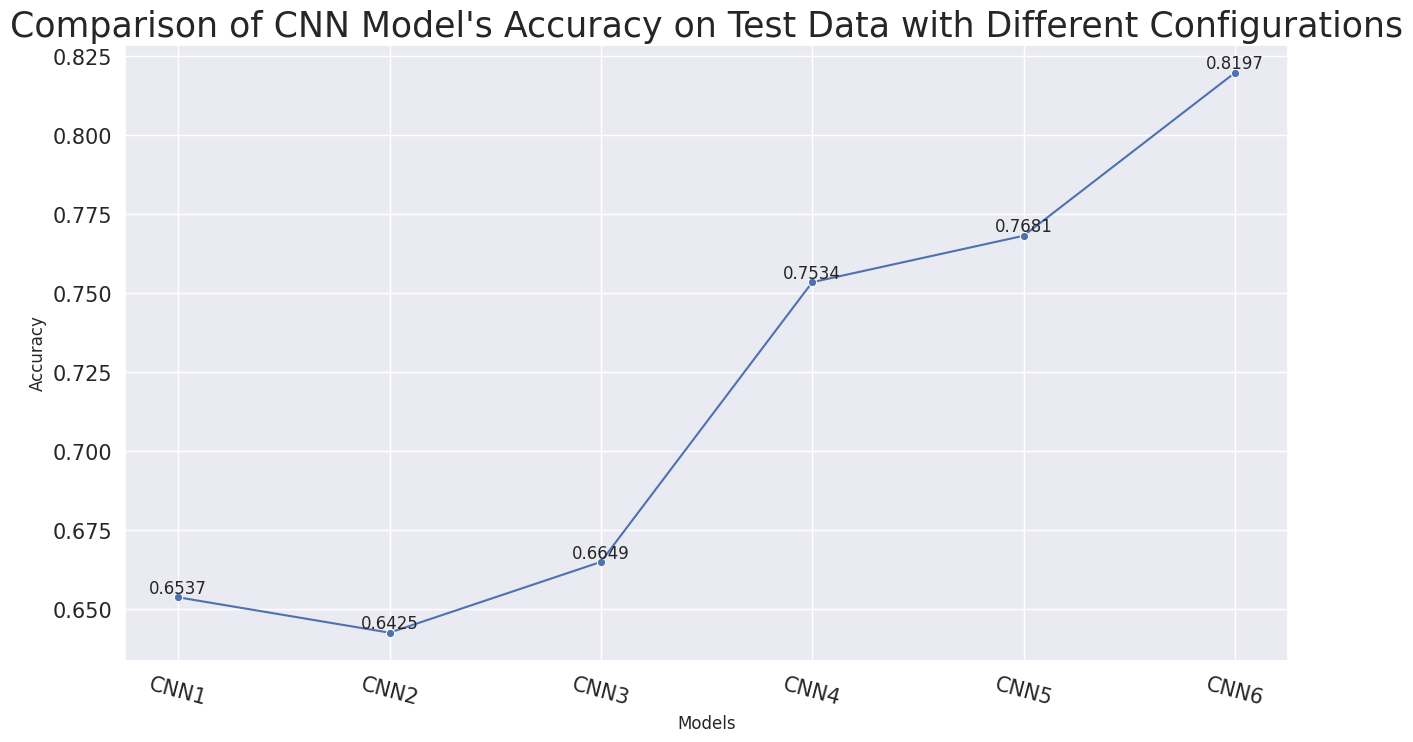

In [82]:
perform_df_test = pd.DataFrame([
    ['CNN1', cnn1_test_avacc],
    ['CNN2', cnn2_test_avacc],
    ['CNN3', cnn3_test_avacc],
    ['CNN4', cnn4_test_avacc],
    ['CNN5', cnn5_test_avacc],
    ['CNN6', cnn6_test_avacc]], columns=['Models', 'Accuracy'])

plt.xticks(rotation=-15,size=15)
plt.yticks(size=15)
sns.set(rc = {'figure.figsize':(25,20)})
model_perform_plot = sns.lineplot(x='Models', y='Accuracy', marker='o', data=perform_df_test)
model_perform_plot.set_title("Comparison of CNN Model's Accuracy on Test Data with Different Configurations",size=25)

for a,b in zip(perform_df_test['Models'],perform_df_test['Accuracy']):
  plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=12)

In [84]:
perform_df_test

,Models,Accuracy
0,CNN1,0.6537
1,CNN2,0.6425
2,CNN3,0.6649
3,CNN4,0.7534
4,CNN5,0.7681
5,CNN6,0.8197


Evaluate and report the loss using different configurations

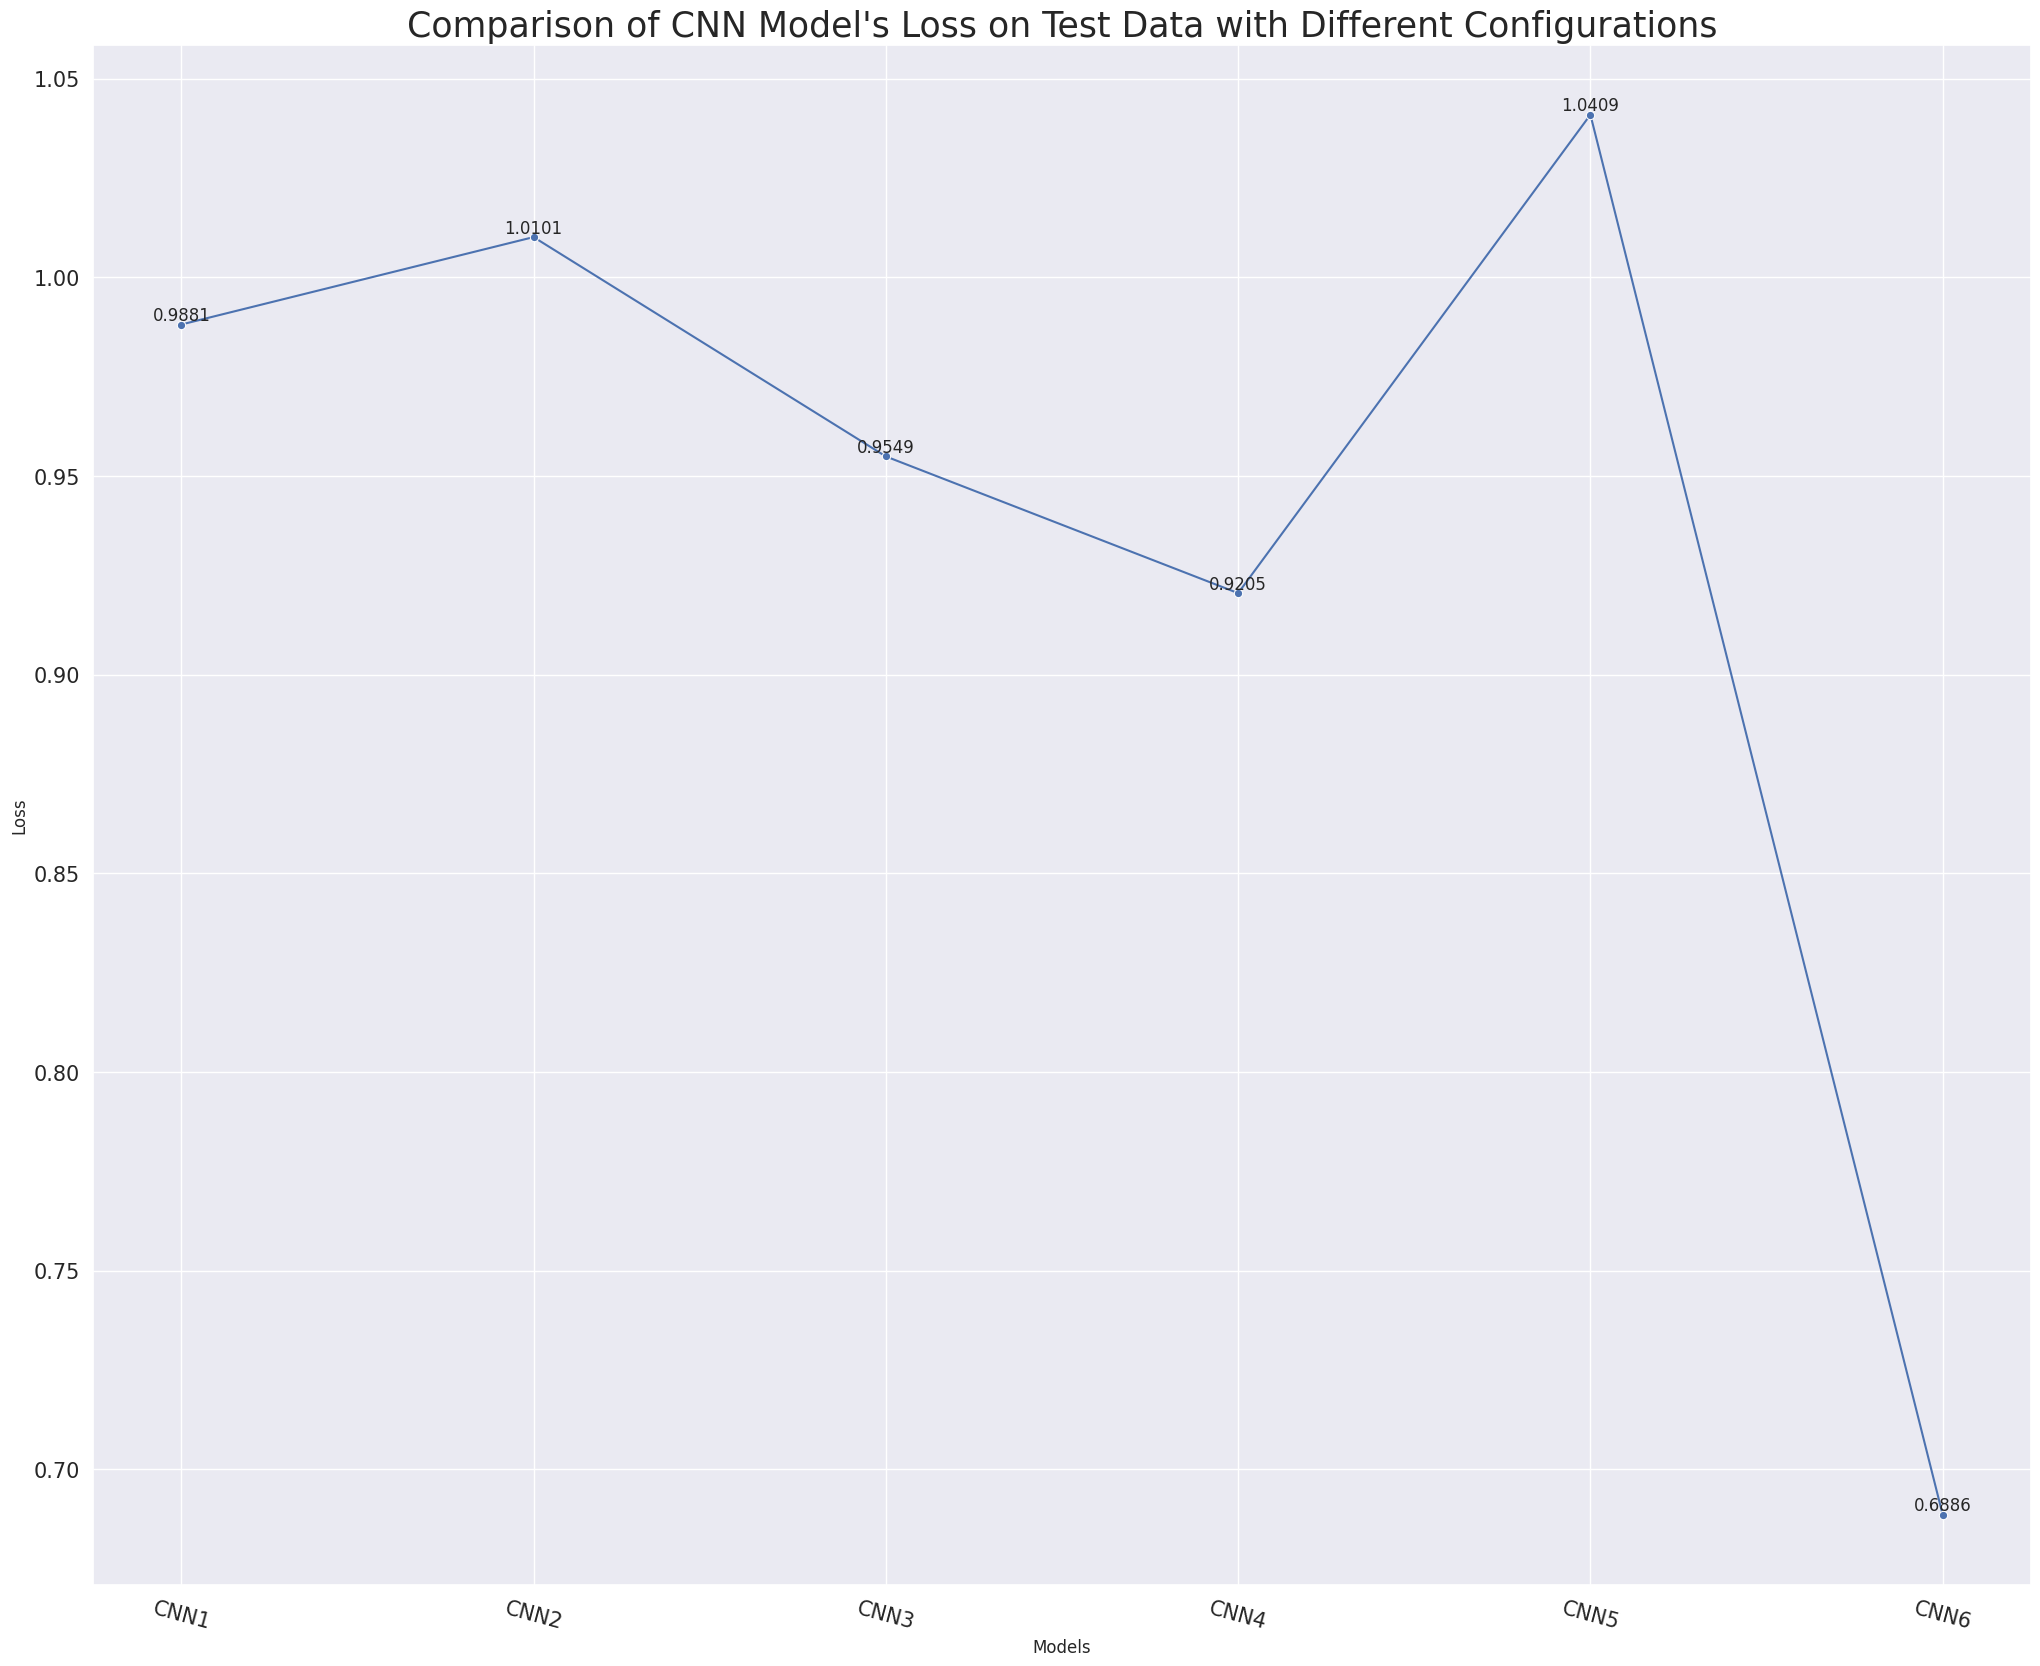

In [83]:
loss_df_test = pd.DataFrame([
    ['CNN1', cnn1_test_avloss],
    ['CNN2', cnn2_test_avloss],
    ['CNN3', cnn3_test_avloss],
    ['CNN4', cnn4_test_avloss],
    ['CNN5', cnn5_test_avloss],
    ['CNN6', cnn6_test_avloss]], columns=['Models', 'Loss'])

plt.xticks(rotation=-15,size=15)
plt.yticks(size=15)
sns.set(rc = {'figure.figsize':(25,20)})
model_loss_plot = sns.lineplot(x='Models', y='Loss', marker='o', data=loss_df_test)
model_loss_plot.set_title("Comparison of CNN Model's Loss on Test Data with Different Configurations",size=25)

for a,b in zip(loss_df_test['Models'],loss_df_test['Loss']):
  plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=12)

In [85]:
loss_df_test

,Models,Loss
0,CNN1,0.9881
1,CNN2,1.0101
2,CNN3,0.9549
3,CNN4,0.9205
4,CNN5,1.0409
5,CNN6,0.6886


##  Discussion

**(1) Which framework can achieve higher accuracy, MLP or CNN? Briefly explain the reason.**


---





Answer : 

CNN framework can achieve higher accuracy. Because CNN can effectively extract local features from images and combine them into global features for classification. In contrast, MLP usually can not appropriately process image data because MLP do not consider the structure and local features of images. CNN can use layers such as convolutional and pooling layers to process images, which can reduce the number of parameters while retaining image features. 
      

**(2) Based on your experiments in Problem3, which parameter can potentially affect your performance most?**


---



Answer : 

1. Based on CNN1 and CNN2, we can find that while adding 30% Dropout in FC
, the performance become better since dropout can reduce the model's capacity and prevent it from memorizing the training data and thus prevent overfitting.

2. Based on CNN3, we increase the # of conv to 5. The result shows that increasing the number of convolutional layers also increases the capacity of the model to learn more complex features and improve the model's ability to extract relevant features from the input data, which improves the performance.

3. Based on CNN4, we change kernel size (conv) to 3x3, using stride (cov) with both 1x1 and 3x3 and set FC layer : 256 -> 84 -> 10.
The result shows that with a larger stride, receptive field will increase, which can improve the model's ability to capture global patterns. And since we also use more complex FC layer, the performance becomes better.

4. Based on CNN5, we add 30% Dropout in FC layer and increase the compexity of FC layer again. Compared with performance of CNN4, the performance gets small progress.

5. Finally, on CNN6 we use Batch normalization strategy. It can act as regularizer, helping to reduce the generalization error of the model and speed up the convergence of the model. So we can get the performance higher than 80%.